In [1]:
#Import libraries to read satellite image
import numpy as np
import pandas as pandas
from matplotlib import pyplot as plt
from PIL import Image,ImageOps
import timeit


In [2]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

We'll apply grayscaling 
Without grayscaling you'd have to apply convolution to each of the three color channels individually

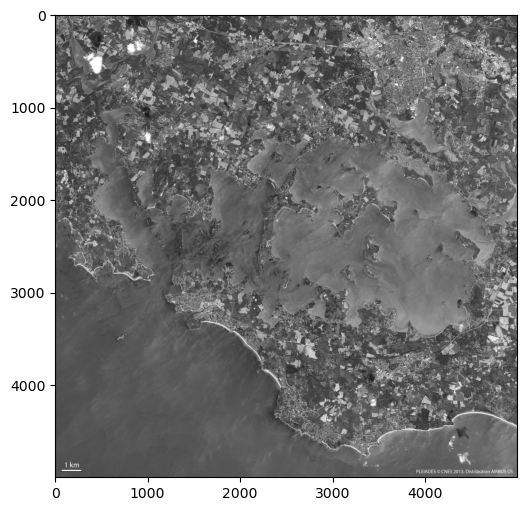

In [3]:
path=r"Data\em_golfe_du_morbihan_20130603.jpg"
Img=Image.open(path)
img = np.array(ImageOps.grayscale(Img))
plot_image(img=img)


In [4]:
img.shape

(4999, 4999)

Test various kernels/filters for convolutions

In [5]:
Kernel1=np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])
Kernel2=np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
Kernel3=np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])
Kernel4=np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])
Kernel5=np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
Kernel6=np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])
Kernel7=np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
Kernel8=np.array([
    [-1 -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
Kernel9=np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8352\2973345466.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Kernel8=np.array([


Implement convolution from scratch
The idea is:
1. first determine how many valid positions exist within the image where a kernel of a specified size can be placed without going beyond the image's boundaries
2. extract matrix from image
3. elementwise multiplication(image_matrix*kernel)
4. sum the elements

In [7]:
def calculate_target_size(img_size, kernel_size) :
    #Initializes a variable num_pixels to keep track of the number of pixels that will be covered by the convolution operation.
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    #to consider every possible starting position for the kernel within the image.
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i  
        # ending position of the kernel when placed at the current starting position.
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [8]:
calculate_target_size(img_size=4999, kernel_size=3)

4997

In [9]:
def convolve(img, kernel):
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

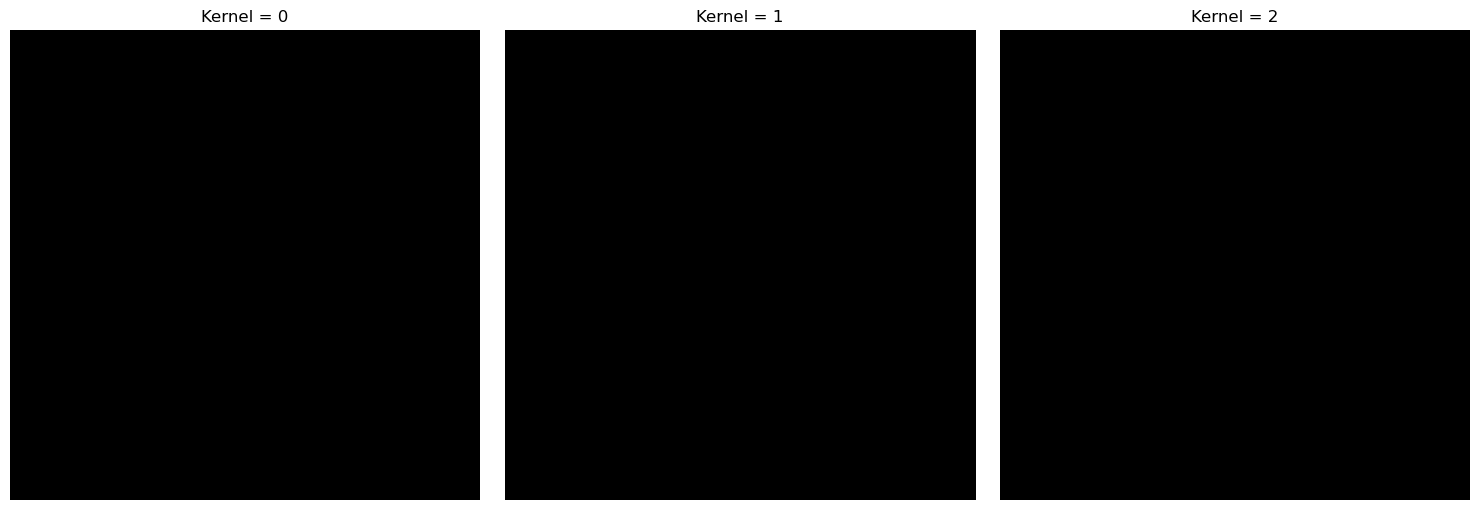

In [10]:
kernels=Kernel1#,Kernel2,Kernel3,Kernel4,Kernel5,Kernel6,Kernel7,Kernel8,Kernel9]
images=[]
fig,axes=plt.subplots(1,len(kernels),figsize=(15,5))
for i, kernel in enumerate(kernels):
    img_convolved = convolve(img, kernel=kernel)
    images.append(img_convolved)

    # Display the convolved image for each kernel
    axes[i].imshow(img_convolved, cmap='gray')  # Assuming the images are grayscale
    axes[i].set_title(f'Kernel = {i}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
img_convolved = convolve(img, kernel=Kernel)

In [ ]:
plot_two_images(
    img1=img, 
    img2=img_convolved
)